## 统计分析实战
* 描述性统计
* 点估计与置信区间
* 概率分布
* t检验
* 卡方检验
* ANOVA
* AB测试案例
* 不同渠道用户转化分析案例
* 商品库存案例

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### mean/median

In [4]:
mtcars = pd.read_csv('./data/mtcars.csv')
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
mtcars.shape

(32, 12)

In [5]:
mtcars.set_index(['name'], inplace=True)
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
mtcars.mean()        # 获取每一列的均值

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [6]:
mtcars.median()       # 每一列的中位数

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

In [7]:
mtcars.mean(axis=1)       # 行的平均数

name
Mazda RX4              29.907273
Mazda RX4 Wag          29.981364
Datsun 710             23.598182
Hornet 4 Drive         38.739545
Hornet Sportabout      53.664545
Valiant                35.049091
Duster 360             59.720000
Merc 240D              24.634545
Merc 230               27.233636
Merc 280               31.860000
Merc 280C              31.787273
Merc 450SE             46.430909
Merc 450SL             46.500000
Merc 450SLC            46.350000
Cadillac Fleetwood     66.232727
Lincoln Continental    66.058545
Chrysler Imperial      65.972273
Fiat 128               19.440909
Honda Civic            17.742273
Toyota Corolla         18.814091
Toyota Corona          24.888636
Dodge Challenger       47.240909
AMC Javelin            46.007727
Camaro Z28             58.752727
Pontiac Firebird       57.379545
Fiat X1-9              18.928636
Porsche 914-2          24.779091
Lotus Europa           24.880273
Ford Pantera L         60.971818
Ferrari Dino           34.508182
Maser

In [11]:
norm = pd.DataFrame(np.random.normal(size=1000))
norm.head()
print(norm.mean(), norm.std())

0    0.018905
dtype: float64 0    0.973767
dtype: float64


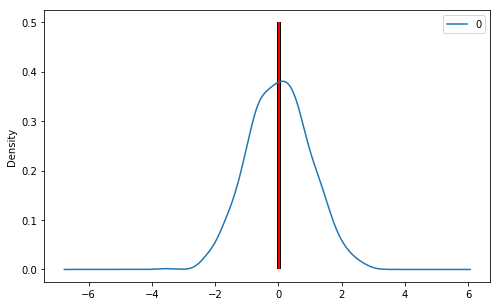

In [13]:
norm.plot(kind='density', figsize=(8,5))
plt.vlines(norm.mean(), ymin=0, ymax=0.5, linewidth=4)
plt.vlines(norm.median(), ymin=0, ymax=0.5, linewidth=2, colors='red')

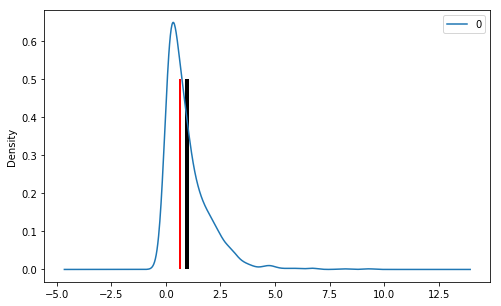

In [14]:
norm=pd.DataFrame(np.random.exponential(size=1000))
norm.plot(kind='density', figsize=(8, 5))
plt.vlines(norm.mean(), ymin=0, ymax=0.5, linewidth=4)
plt.vlines(norm.median(), ymin=0, ymax=0.5, linewidth=2, color='red')

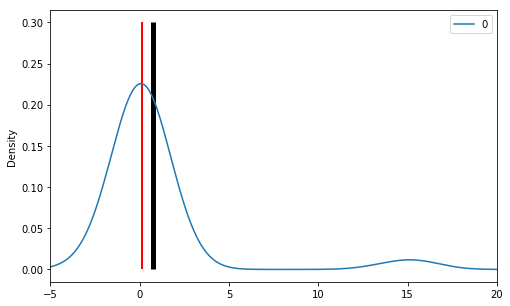

In [11]:
norm = np.random.normal(size=100)
outliers = np.random.normal(15, size=5)
combined_data = pd.DataFrame(np.concatenate((norm, outliers), axis=0))
combined_data.plot(kind='density', figsize=(8, 5), xlim=(-5, 20))
plt.vlines(combined_data.mean(), ymin=0, ymax=0.3, linewidth=5.0)
plt.vlines(combined_data.median(), ymin=0, ymax=0.3, linewidth=2.0, color='red')

## spread

In [4]:
max(mtcars['mpg']) - min(mtcars['mpg'])

23.5

In [5]:
mtcars['mpg'].describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

In [6]:
mtcars['mpg'].quantile(0.5)

19.2

> 在使用boxplot的时候，使用 **`return_type='axes'`** 的作用，只是为了让系统不报错。

Text(0.7,19.5,'IQR')

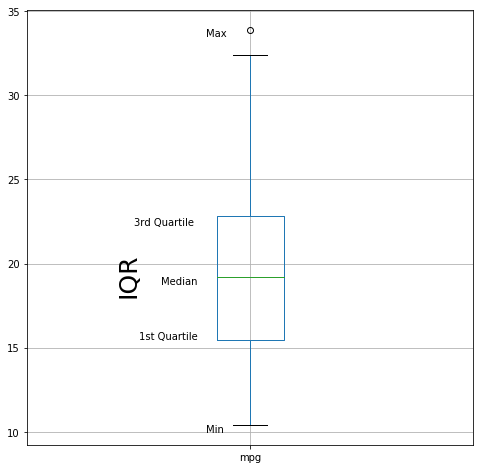

In [6]:
mtcars.boxplot(column='mpg', return_type='axes', figsize=(8,8))
# 实际上text也就是在x，y对应的坐标上写对应的文字。
plt.text(x=0.74, y=22.25, s='3rd Quartile')
plt.text(x=0.8, y=18.75, s='Median')
plt.text(x=0.75,y=15.5,s='1st Quartile')
plt.text(x=0.9,y=33.5, s='Max')
plt.text(x=0.9,y=10, s='Min')
plt.text(x=0.7,y=19.5, s='IQR', rotation=90, size=25)

### 方差

In [7]:
mtcars['mpg'].var()

36.324102822580642

### 标准差

In [8]:
mtcars['mpg'].std()

6.0269480520891037

In [9]:
abs_median_devs = abs(mtcars['mpg'] - mtcars['mpg'].median())    # median absolute deviation
abs_median_devs.median() * 1.4826                                # https://en.wikipedia.org/wiki/Median_absolute_deviation

5.411490000000001

## 描述数据的峰度和偏度(skew/kurtosis)
* [skewness](https://baike.baidu.com/item/偏度/8626571?fr=aladdin)  (偏度)
* [kurtosis](https://baike.baidu.com/item/峰度)      （峰度）

> DataFrame的 **`skew`** 方法是用来获取数据的偏度的，**如果返回值大于0，就表示右偏， 小于0表示左偏** 。

In [12]:
combined_data.skew()   # 右偏

0    3.679333
dtype: float64

In [14]:
norm_data = np.random.normal(size=10000)
skewed_data = np.concatenate((np.random.normal(size=3500) + 2, np.random.exponential(size=6500)), axis=0)
uniform_data = np.random.uniform(0, 2, size=10000)
peaked_data = np.concatenate((np.random.exponential(size=5000), np.random.exponential(size=5000) * (-1)), axis=0)
data_df = pd.DataFrame({'norm': norm_data, 'skewed': skewed_data, 'uniform': uniform_data, 'peaked':peaked_data})

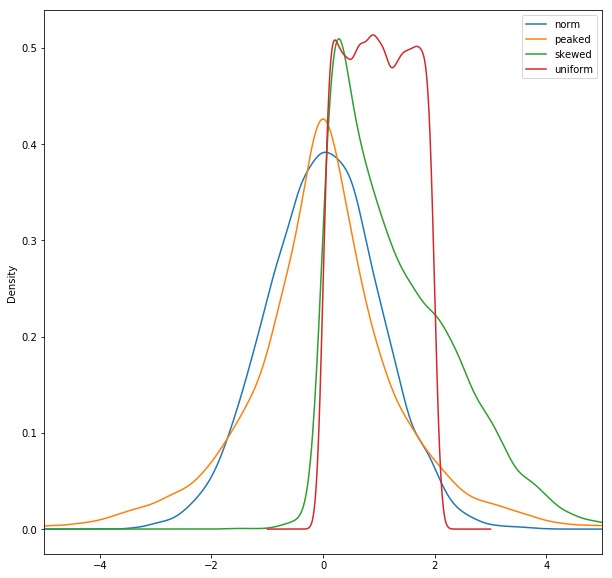

In [15]:
data_df.plot(kind='density', figsize=(10,10), xlim=(-5, 5))

In [16]:
import scipy.stats as stats
stats.kurtosis(norm_data), stats.kurtosis(peaked_data), stats.kurtosis(skewed_data), stats.kurtosis(uniform_data)

(0.05508764888073392,
 2.589479007677755,
 0.9031678894777051,
 -1.2035778273141278)